Хотела сделать анализ профиля клиентов банка, как бывший сотрудник банка, но с базами не сложилось:)) Поэтому будет анализ цен на жилье, как бывший риэлтор %) Нашла какую-то базу по городу, и начнем с ней работать.

# Бизнес-цель простая: анализ рынка недвижимости, что позволяет делать выгодные покупки/вложения/финансирования.  Использован dataset по городу Ижевску за 2020-2021гг.


In [599]:
# подключаем гугл диск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [639]:
#добавляем библиотеки
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/itogov/Izhevsk.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [601]:
#добавляем библиотеки
import matplotlib.pyplot as plt
import seaborn as sns


In [640]:
#читаем файл
df = pd.read_csv('/content/drive/MyDrive/itogov/Izhevsk.csv', header=0, sep= ';', encoding='utf8')
df.head()

,id,City,Address,MinPricePerSqMeter,AvgPricePerSqMeter,MaxPricePerSqMeter,OffersCount,TotalFloors,WktPoint,Lat,Lon,OnDate,Source,Unnamed: 13
0,218080.0,Ижевск,"д. Каменное, Весенняя,7",48000.0,48000.0,48000.0,1.0,18.0,POINT(53.275369 56.725734),56.725734,53.275369,01.01.2021 0:00:00,NaN,NaN
1,50829.0,Ижевск,"д.Каменное, Весенняя,9",26000.0,42000.0,54000.0,380.0,8.0,POINT(53.275046 56.72561),56.725610,53.275046,01.03.2021 0:00:00,NaN,NaN
2,248968.0,Ижевск,"д. Пирогово, Высотная,1",39000.0,39000.0,39000.0,1.0,5.0,POINT(53.160493 56.787395),56.787395,53.160493,01.03.2021 0:00:00,NaN,NaN
3,231694.0,Ижевск,"д.Пирогово, Высотная,2",34000.0,37000.0,40000.0,3.0,5.0,POINT(53.16008 56.787888),56.787888,53.160080,01.03.2021 0:00:00,NaN,NaN
4,244483.0,Ижевск,"д.Пирогово, Высотная,2А",36000.0,41000.0,44000.0,3.0,5.0,POINT(53.158993 56.788805),56.788805,53.158993,01.03.2021 0:00:00,NaN,NaN


In [641]:
#оставляем выбранные столбцы
df = df [['Address','MinPricePerSqMeter','AvgPricePerSqMeter','MaxPricePerSqMeter','OffersCount','TotalFloors','Lat','Lon' ,'OnDate']]
df.dropna (axis=0, inplace= True)
df.head()

,Address,MinPricePerSqMeter,AvgPricePerSqMeter,MaxPricePerSqMeter,OffersCount,TotalFloors,Lat,Lon,OnDate
0,"д. Каменное, Весенняя,7",48000.0,48000.0,48000.0,1.0,18.0,56.725734,53.275369,01.01.2021 0:00:00
1,"д.Каменное, Весенняя,9",26000.0,42000.0,54000.0,380.0,8.0,56.725610,53.275046,01.03.2021 0:00:00
2,"д. Пирогово, Высотная,1",39000.0,39000.0,39000.0,1.0,5.0,56.787395,53.160493,01.03.2021 0:00:00
3,"д.Пирогово, Высотная,2",34000.0,37000.0,40000.0,3.0,5.0,56.787888,53.160080,01.03.2021 0:00:00
4,"д.Пирогово, Высотная,2А",36000.0,41000.0,44000.0,3.0,5.0,56.788805,53.158993,01.03.2021 0:00:00


Предварительный анализ данных

In [642]:
df.isnull().sum()

Address               0
MinPricePerSqMeter    0
AvgPricePerSqMeter    0
MaxPricePerSqMeter    0
OffersCount           0
TotalFloors           0
Lat                   0
Lon                   0
OnDate                0
dtype: int64

In [643]:
# Lat- широта
# Lon-долгота
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinPricePerSqMeter,2924.0,38241.108071,8160.153237,0.000000,35000.000000,38000.000000,43000.000000,84000.000000
AvgPricePerSqMeter,2924.0,43999.316005,8121.806167,8000.000000,40000.000000,45000.000000,48000.000000,147000.000000
MaxPricePerSqMeter,2924.0,50815.663475,16714.888369,8000.000000,44000.000000,51000.000000,56000.000000,527000.000000
OffersCount,2924.0,9.499658,19.057065,1.000000,2.000000,6.000000,10.000000,380.000000
TotalFloors,2924.0,7.192544,4.308279,1.000000,5.000000,5.000000,9.000000,99.000000
Lat,2924.0,56.852971,0.026971,56.445777,56.838387,56.854704,56.872538,56.972919
Lon,2924.0,53.224356,0.058035,52.237052,53.186802,53.223461,53.262355,53.533482


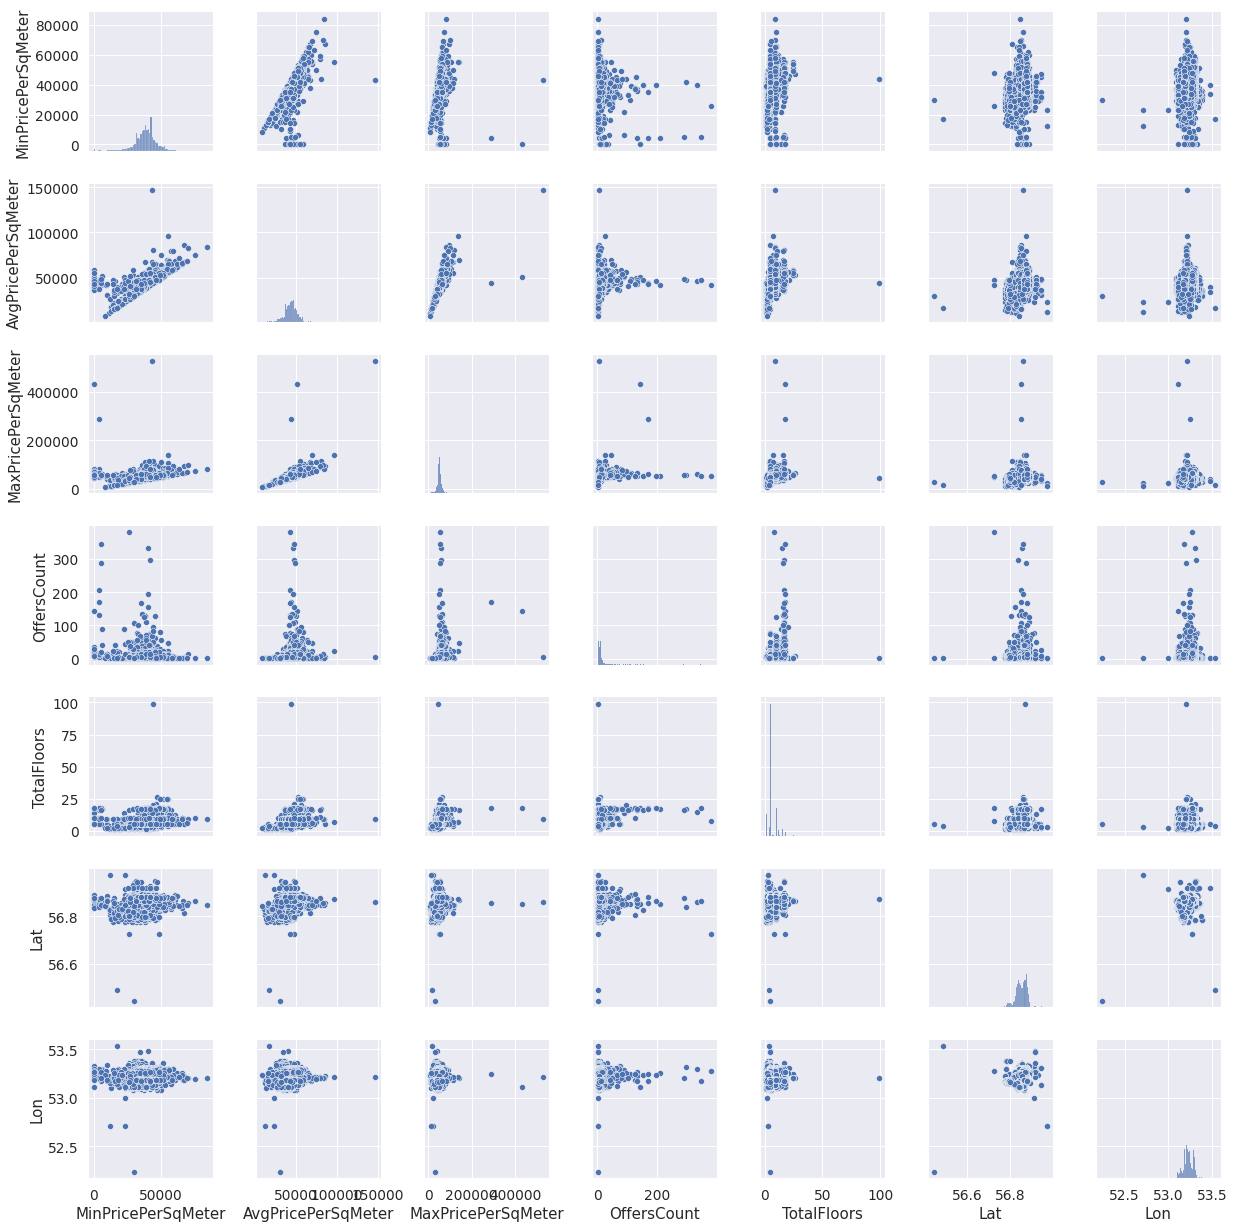

In [606]:
sns.pairplot(df)

<Figure size 720x432 with 0 Axes>

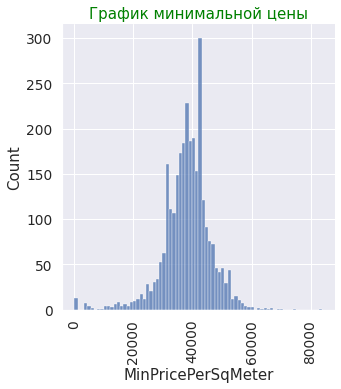

In [644]:
#построим график
plt.figure(figsize= (10,6))
sns.displot(df['MinPricePerSqMeter'])
plt.title('График минимальной цены',fontsize=15, color="green")
plt.xticks(rotation=90)
plt.show()

<Figure size 720x432 with 0 Axes>

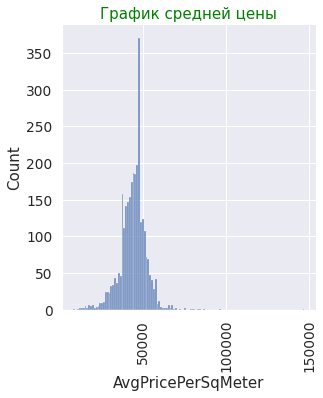

In [645]:
#построим график
plt.figure(figsize= (10,6))
sns.displot(df['AvgPricePerSqMeter'])
plt.title('График средней цены',fontsize=15, color="green")
plt.xticks(rotation=90)
plt.show()


<Figure size 720x432 with 0 Axes>

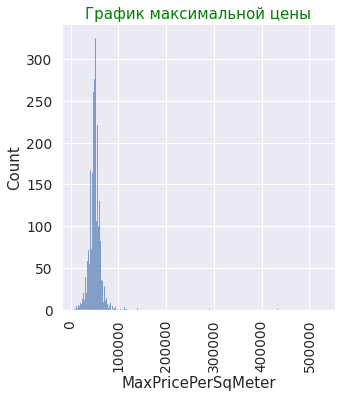

In [646]:
#построим график
plt.figure(figsize= (10,6))
sns.displot(df['MaxPricePerSqMeter'])
plt.title('График максимальной цены',fontsize=15, color="green")
plt.xticks(rotation=90)
plt.show()

In [647]:
df.corr()['AvgPricePerSqMeter'].sort_values()

OffersCount           0.134098
Lon                   0.180024
Lat                   0.250608
TotalFloors           0.467530
MaxPricePerSqMeter    0.713934
MinPricePerSqMeter    0.724297
AvgPricePerSqMeter    1.000000
Name: AvgPricePerSqMeter, dtype: float64

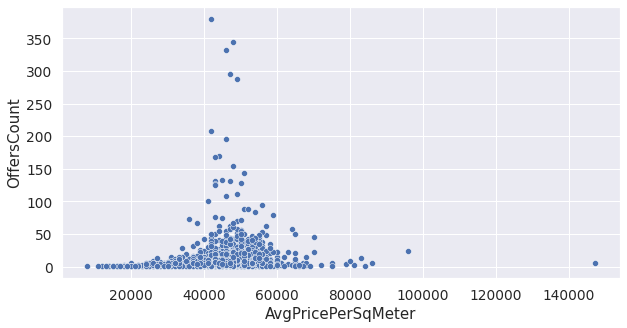

In [648]:
# анализ средней цены и количества предложений
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'AvgPricePerSqMeter',y = 'OffersCount' ,data = df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]), <a list of 71 Text major ticklabel objects>)

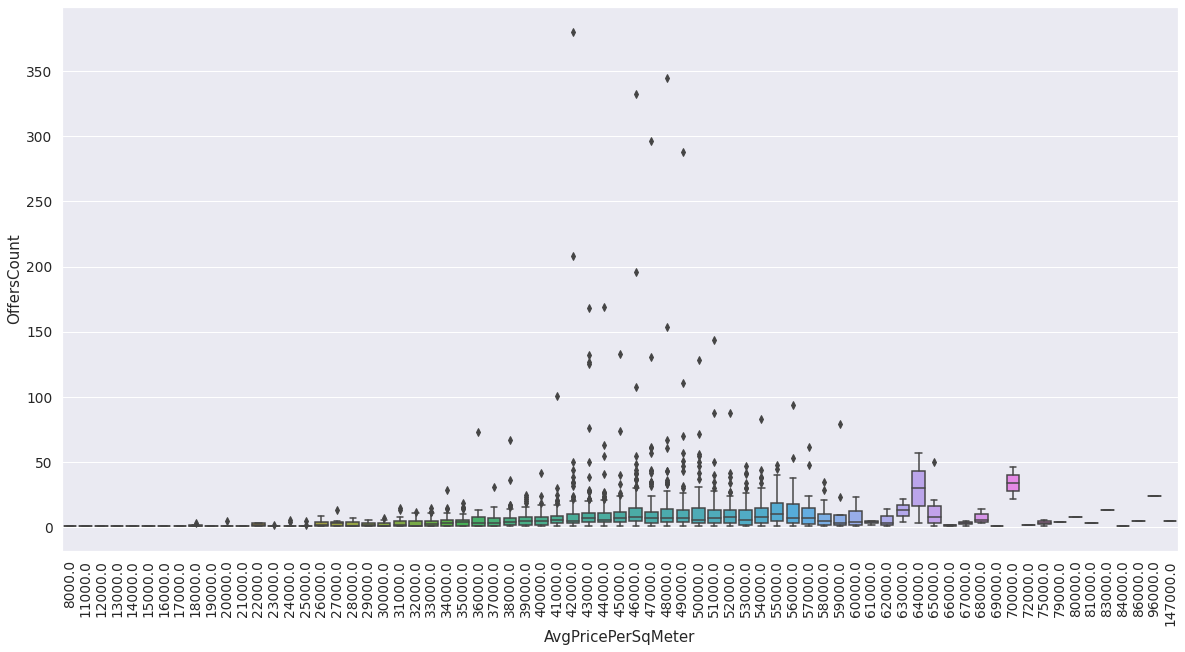

In [649]:
# анализ средней цены и количества предложений
plt.figure(figsize = (20,10))
sns.boxplot(x = 'AvgPricePerSqMeter',y = 'OffersCount',data = df)
plt.xticks(rotation=90)

In [650]:
columns = ['MinPricePerSqMeter','AvgPricePerSqMeter','MaxPricePerSqMeter']
dframe = pd.DataFrame(df, index =['MinPricePerSqMeter','AvgPricePerSqMeter','MaxPricePerSqMeter'],columns= [columns] ) 
print (dframe)

                   MinPricePerSqMeter AvgPricePerSqMeter MaxPricePerSqMeter
MinPricePerSqMeter                NaN                NaN                NaN
AvgPricePerSqMeter                NaN                NaN                NaN
MaxPricePerSqMeter                NaN                NaN                NaN


In [651]:
df3= df.iloc [:, [1,2,3]]
df3
df3.corr()
df3.corr().round(3)
corr = df3.corr()
corr.style.background_gradient(cmap='coolwarm')

,MinPricePerSqMeter,AvgPricePerSqMeter,MaxPricePerSqMeter
MinPricePerSqMeter,1.000000,0.724297,0.262194
AvgPricePerSqMeter,0.724297,1.000000,0.713934
MaxPricePerSqMeter,0.262194,0.713934,1.000000


Географические особенности/ район

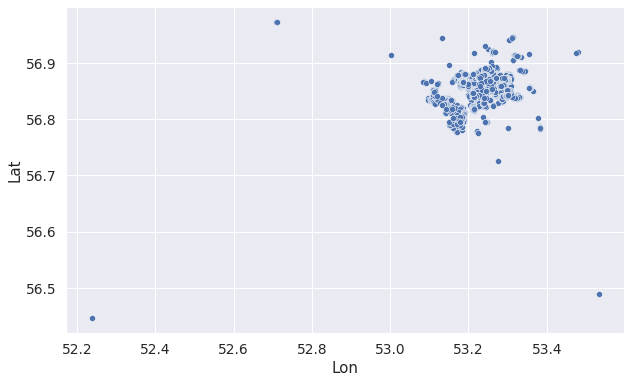

In [652]:
plt.figure(figsize  =(10,6))
sns.scatterplot(x = 'Lon', y = 'Lat', data=df)

In [653]:
# сравнение с картой города Ижевска (https://yandex.ru/maps/44/izhevsk/?ll=53.206896%2C56.852677&z=13)

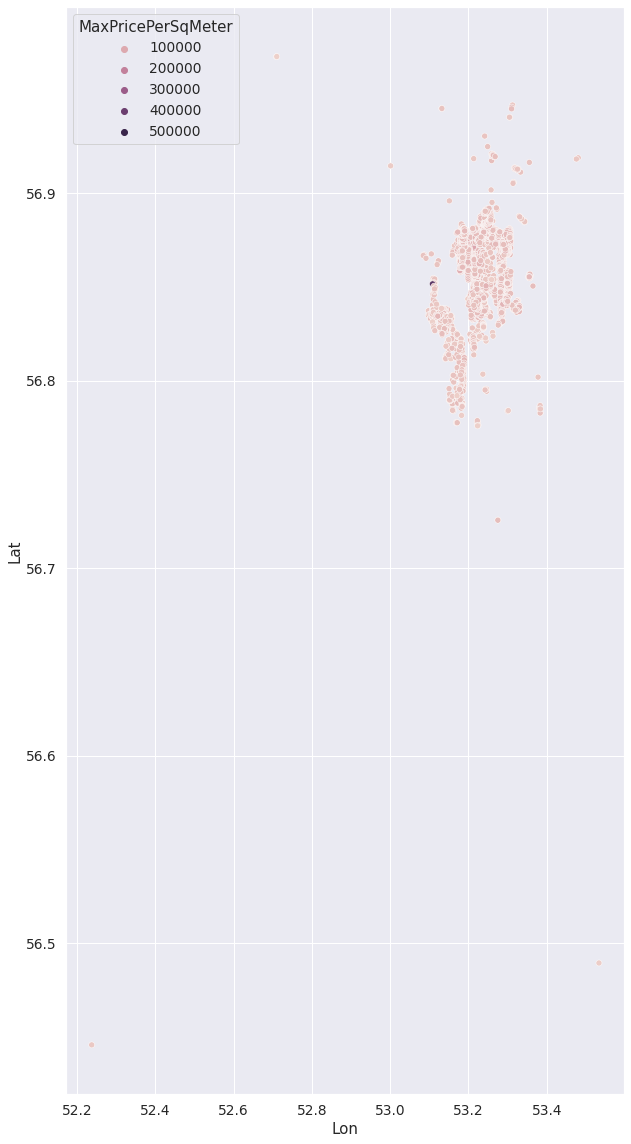

In [654]:
#анализ МАКСимальной цены относительно географической карты
plt.figure(figsize  =(10,20))
sns.scatterplot(x = 'Lon', y = 'Lat', data=df,hue = 'MaxPricePerSqMeter')

In [655]:
# самые дорогая жилплощадь
df.sort_values('MaxPricePerSqMeter',ascending=False).head(30)

,Address,MinPricePerSqMeter,AvgPricePerSqMeter,MaxPricePerSqMeter,OffersCount,TotalFloors,Lat,Lon,OnDate
1425,"Удмуртская,253",43000.0,147000.0,527000.0,5.0,9.0,56.860113,53.219584,01.02.2021 0:00:00
1375,"Тверская,55А",0.0,51000.0,432000.0,144.0,18.0,56.851653,53.108121,01.01.2021 0:00:00
1971,"Герцена, 2",4000.0,44000.0,290000.0,169.0,18.0,56.853730,53.243614,01.03.2021 0:00:00
1144,"Пушкинская,279А",55000.0,70000.0,140000.0,46.0,16.0,56.866568,53.206720,01.01.2021 0:00:00
1461,"10 лет Октября, 17А",55000.0,96000.0,139000.0,24.0,7.0,56.873480,53.215128,01.11.2020 0:00:00
1242,"Советская,11",44000.0,81000.0,117000.0,3.0,17.0,56.845682,53.207367,01.04.2021 0:00:00
1929,"Гагарина, 3А",41000.0,55000.0,114000.0,24.0,5.0,56.812448,53.188969,01.01.2021 0:00:00
1065,"Пушкинская,155",43000.0,67000.0,113000.0,3.0,4.0,56.833275,53.217302,01.11.2020 0:00:00
2377,"Коммунаров, 247",50000.0,75000.0,113000.0,6.0,7.0,56.848271,53.216683,01.11.2020 0:00:00
1245,"Советская,16",38000.0,67000.0,112000.0,5.0,5.0,56.845618,53.215524,01.12.2020 0:00:00


In [656]:
# отобрали 1% 
len(df)*(0.01)

29.240000000000002

In [657]:
#самое дорогое жилье
non_top_1_perc = df.sort_values('MaxPricePerSqMeter',ascending=False).iloc[216:]

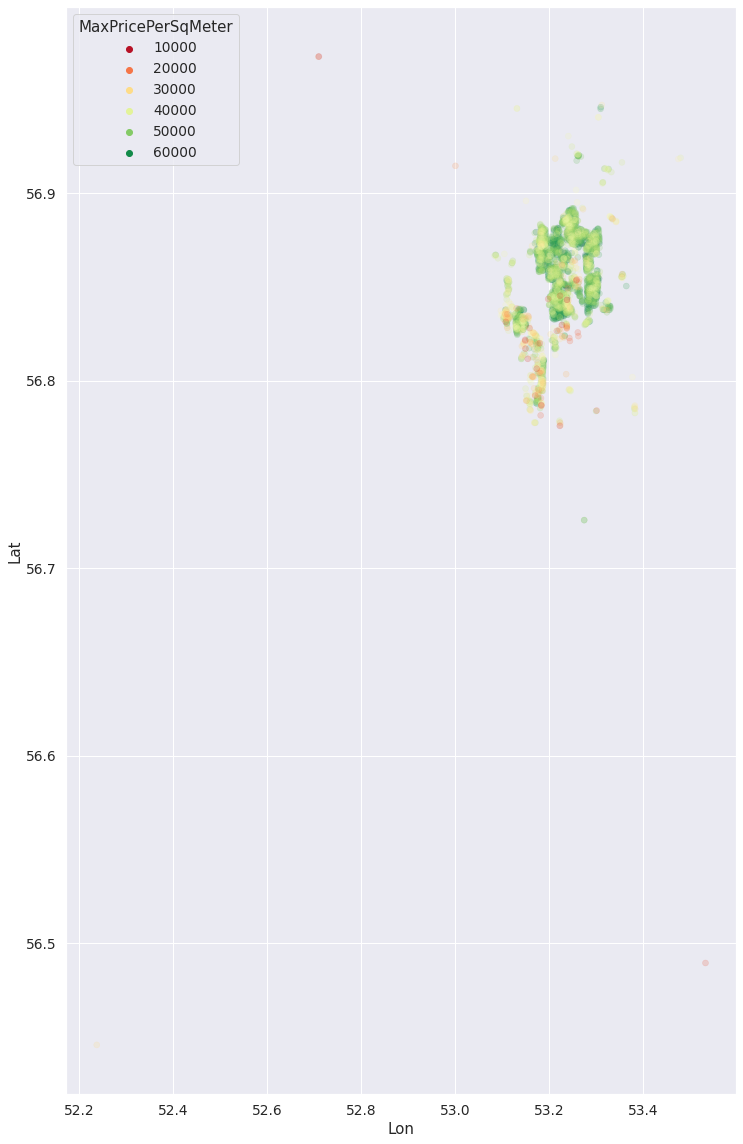

In [658]:
plt.figure(figsize  =(12,20))
sns.scatterplot(x = 'Lon', y = 'Lat', data=non_top_1_perc,hue = 'MaxPricePerSqMeter',palette='RdYlGn',edgecolor=None,alpha=0.2)
#самое дорогое жилье относительно географии

СНОВА С ДАННЫМИ

In [659]:
df.head()

,Address,MinPricePerSqMeter,AvgPricePerSqMeter,MaxPricePerSqMeter,OffersCount,TotalFloors,Lat,Lon,OnDate
0,"д. Каменное, Весенняя,7",48000.0,48000.0,48000.0,1.0,18.0,56.725734,53.275369,01.01.2021 0:00:00
1,"д.Каменное, Весенняя,9",26000.0,42000.0,54000.0,380.0,8.0,56.725610,53.275046,01.03.2021 0:00:00
2,"д. Пирогово, Высотная,1",39000.0,39000.0,39000.0,1.0,5.0,56.787395,53.160493,01.03.2021 0:00:00
3,"д.Пирогово, Высотная,2",34000.0,37000.0,40000.0,3.0,5.0,56.787888,53.160080,01.03.2021 0:00:00
4,"д.Пирогово, Высотная,2А",36000.0,41000.0,44000.0,3.0,5.0,56.788805,53.158993,01.03.2021 0:00:00


In [660]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2923
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Address             2924 non-null   object 
 1   MinPricePerSqMeter  2924 non-null   float64
 2   AvgPricePerSqMeter  2924 non-null   float64
 3   MaxPricePerSqMeter  2924 non-null   float64
 4   OffersCount         2924 non-null   float64
 5   TotalFloors         2924 non-null   float64
 6   Lat                 2924 non-null   float64
 7   Lon                 2924 non-null   float64
 8   OnDate              2924 non-null   object 
dtypes: float64(7), object(2)
memory usage: 293.0+ KB


In [629]:
#df = df.drop('MaxPricePerSqMeter',axis=1)


Фукнция даты

In [661]:
df['OnDate'] = pd.to_datetime(df['OnDate'])

In [662]:
df['year'] = df['OnDate'].dt.year
df['month'] = df['OnDate'].dt.month

In [663]:
df.head()

,Address,MinPricePerSqMeter,AvgPricePerSqMeter,MaxPricePerSqMeter,OffersCount,TotalFloors,Lat,Lon,OnDate,year,month
0,"д. Каменное, Весенняя,7",48000.0,48000.0,48000.0,1.0,18.0,56.725734,53.275369,2021-01-01,2021,1
1,"д.Каменное, Весенняя,9",26000.0,42000.0,54000.0,380.0,8.0,56.725610,53.275046,2021-01-03,2021,1
2,"д. Пирогово, Высотная,1",39000.0,39000.0,39000.0,1.0,5.0,56.787395,53.160493,2021-01-03,2021,1
3,"д.Пирогово, Высотная,2",34000.0,37000.0,40000.0,3.0,5.0,56.787888,53.160080,2021-01-03,2021,1
4,"д.Пирогово, Высотная,2А",36000.0,41000.0,44000.0,3.0,5.0,56.788805,53.158993,2021-01-03,2021,1


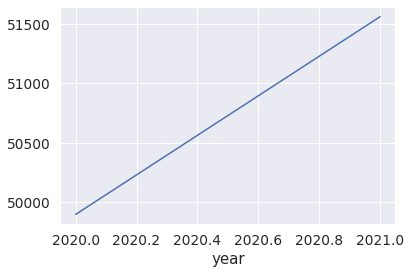

In [666]:
# изменение цены
df.groupby('year').mean()['MaxPricePerSqMeter'].plot()

In [636]:
#df = df.drop('AvgPricePerSqMeter',axis=1)

In [710]:
df.head()

,Address,MinPricePerSqMeter,AvgPricePerSqMeter,MaxPricePerSqMeter,OffersCount,TotalFloors,Lat,Lon,OnDate,year,month
0,"д. Каменное, Весенняя,7",48000.0,48000.0,48000.0,1.0,18.0,56.725734,53.275369,2021-01-01,2021,1
1,"д.Каменное, Весенняя,9",26000.0,42000.0,54000.0,380.0,8.0,56.725610,53.275046,2021-01-03,2021,1
2,"д. Пирогово, Высотная,1",39000.0,39000.0,39000.0,1.0,5.0,56.787395,53.160493,2021-01-03,2021,1
3,"д.Пирогово, Высотная,2",34000.0,37000.0,40000.0,3.0,5.0,56.787888,53.160080,2021-01-03,2021,1
4,"д.Пирогово, Высотная,2А",36000.0,41000.0,44000.0,3.0,5.0,56.788805,53.158993,2021-01-03,2021,1


In [711]:
df.columns

Index(['Address', 'MinPricePerSqMeter', 'AvgPricePerSqMeter',
       'MaxPricePerSqMeter', 'OffersCount', 'TotalFloors', 'Lat', 'Lon',
       'OnDate', 'year', 'month'],
      dtype='object')

Начало обучения


In [712]:
df1 = df [['MaxPricePerSqMeter','year']]
df1.dropna (axis=0, inplace= True)
df1.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,MaxPricePerSqMeter,year
0,48000.0,2021
1,54000.0,2021
2,39000.0,2021
3,40000.0,2021
4,44000.0,2021


In [673]:
#df.isna().sum()

In [713]:
df1.head()

,MaxPricePerSqMeter,year
0,48000.0,2021
1,54000.0,2021
2,39000.0,2021
3,40000.0,2021
4,44000.0,2021


In [714]:
df1.isna().sum()

MaxPricePerSqMeter    0
year                  0
dtype: int64

In [676]:
X = df1.drop('MaxPricePerSqMeter',axis=1).values
y = df1['year'].values

In [677]:
from sklearn.model_selection import train_test_split

In [678]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [679]:
from sklearn.preprocessing import MinMaxScaler

In [680]:
scaler = MinMaxScaler()

In [681]:
X_train = scaler.fit_transform (X_train)

In [682]:
X_test = scaler.transform(X_test)

Создание модели

In [683]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [684]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

Обучение модели

In [685]:
model.fit(x=X_train,y=y_train,
         validation_data=(X_test,y_test),
         batch_size=128,epochs = 300)

Epoch 1/300
16/16 [==============================] - 1s 15ms/step - loss: 4082372.0000 - val_loss: 4082155.0000
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 4081768.7500 - val_loss: 4081351.2500
Epoch 3/300
16/16 [==============================] - 0s 5ms/step - loss: 4080682.0000 - val_loss: 4079862.7500
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 4078635.7500 - val_loss: 4076896.2500
Epoch 5/300
16/16 [==============================] - 0s 5ms/step - loss: 4074652.0000 - val_loss: 4071415.2500
Epoch 6/300
16/16 [==============================] - 0s 5ms/step - loss: 4067501.7500 - val_loss: 4061801.0000
Epoch 7/300
16/16 [==============================] - 0s 4ms/step - loss: 4055162.2500 - val_loss: 4045367.0000
Epoch 8/300
16/16 [==============================] - 0s 4ms/step - loss: 4034479.7500 - val_loss: 4018358.5000
Epoch 9/300
16/16 [==============================] - 0s 8ms/step - loss: 4000938.5000 - val_loss: 3975637.2500


In [686]:
losses = pd.DataFrame(model.history.history)

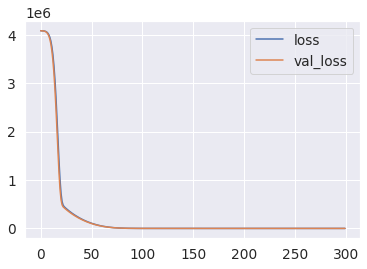

In [687]:
losses.plot()

Оценка по данным испытаний

In [688]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [689]:
predictions = model.predict(X_test)
mean_squared_error(y_test,predictions)

28/28 [==============================] - 0s 1ms/step


6.179399533804022e-08

In [690]:
np.sqrt(mean_squared_error(y_test,predictions))


0.00024858398045336756

In [691]:
mean_absolute_error(y_test,predictions)

0.00016753385713268792

In [692]:
df1['MaxPricePerSqMeter'].describe()

count      2924.000000
mean      50815.663475
std       16714.888369
min        8000.000000
25%       44000.000000
50%       51000.000000
75%       56000.000000
max      527000.000000
Name: MaxPricePerSqMeter, dtype: float64

In [693]:
50815.663475 #(mean)

#стоимость средней цены кв метр

50815.663475

In [694]:
explained_variance_score(y_test,predictions)

0.9999998507033101

Прогноз на новое жилье

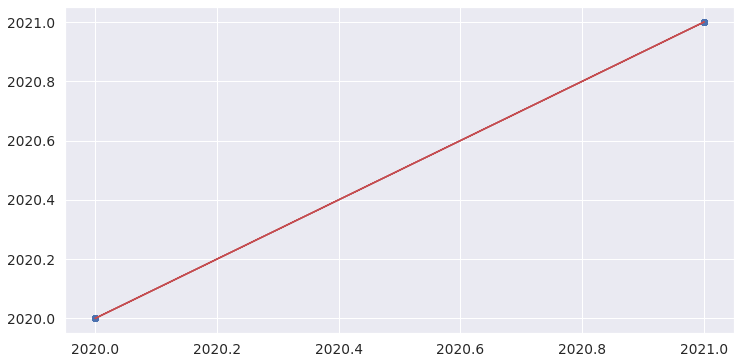

In [695]:
# прогноз
plt.figure(figsize = (12,6))
plt.scatter(y_test,predictions)

plt.plot(y_test,y_test,'r')

вариант прогноза 1)

In [702]:
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [703]:
feature_data = df1.drop(['MaxPricePerSqMeter'],axis=1)
target_data = df1['MaxPricePerSqMeter']
 
# набор данных на обучающие и тестовые наборы
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3)

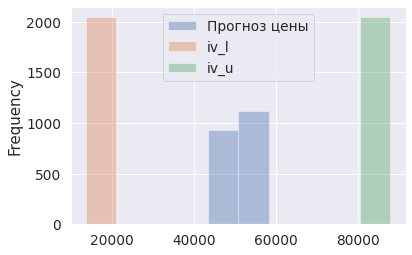

In [704]:
# prstd - стандартное отклонение, iv_l - нижний доверительный интервал, а iv_u - верхний доверительный интервал.
prstd, iv_l, iv_u = wls_prediction_std(lr_model, alpha = 0.05)
 # lr_model.predict () - это прогнозируемое значение обучающего набора
predict_low_upper = pd.DataFrame([lr_model.predict(),iv_l, iv_u],index=['Прогноз цены','iv_l','iv_u']).T
predict_low_upper.plot(kind='hist',alpha=0.4)

вариант прогноза 2)

In [705]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = df1.drop(['MaxPricePerSqMeter'], axis=1)
y = df1['MaxPricePerSqMeter']
 
# для обучения и валидации
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=0)

In [706]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(y_valid, y_pred))

0.2077813849830422


In [707]:
#Линейная регрессия. Здесь мы должны прогнозировать цену продажи
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(y_valid, y_pred))

0.2077813849830422


вариант 3)

Ниже не смогла исправить ошибку

In [708]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
le = preprocessing.LabelEncoder()


In [709]:
house = df1.drop('MaxPricePerSqMeter', axis=1).iloc[0]



In [715]:
house

year    2021
Name: 0, dtype: int64

In [735]:
house1 =scaler.transform (house.values.reshape (-1,22))

ValueError: ignored

In [726]:
house1

array([[ -4.71831162,   0.87915579],
       [ -4.7229099 ,   0.87358926],
       [ -2.43174152,  -1.10059623],
       ...,
       [  0.97577116,  -0.89361808],
       [-15.09993542, -17.01500988],
       [-13.48019044,   5.32742812]])

In [734]:
#прогноз цены
model.predict(house1)

InvalidArgumentError: ignored

In [732]:
#реальная цена
df.head(5)

,Address,MinPricePerSqMeter,AvgPricePerSqMeter,MaxPricePerSqMeter,OffersCount,TotalFloors,Lat,Lon,OnDate,year,month
0,"д. Каменное, Весенняя,7",48000.0,48000.0,48000.0,1.0,18.0,56.725734,53.275369,2021-01-01,2021,1
1,"д.Каменное, Весенняя,9",26000.0,42000.0,54000.0,380.0,8.0,56.725610,53.275046,2021-01-03,2021,1
2,"д. Пирогово, Высотная,1",39000.0,39000.0,39000.0,1.0,5.0,56.787395,53.160493,2021-01-03,2021,1
3,"д.Пирогово, Высотная,2",34000.0,37000.0,40000.0,3.0,5.0,56.787888,53.160080,2021-01-03,2021,1
4,"д.Пирогово, Высотная,2А",36000.0,41000.0,44000.0,3.0,5.0,56.788805,53.158993,2021-01-03,2021,1


In [733]:
output = pd.DataFrame({'цены на жилье':[predictions]})
output.to_csv('forecast.csv',index=False)
print("сохранить")

сохранить
